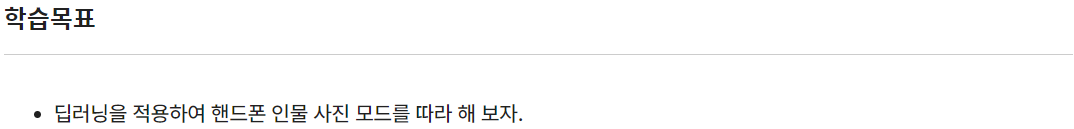

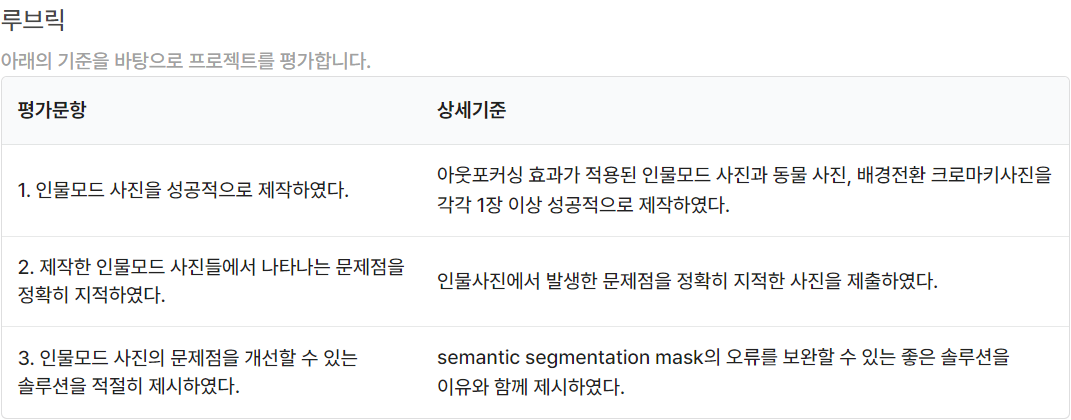

### 라이브러리 불러오고 버전 확인

In [1]:
import os, urllib, cv2, pixellib
from PIL import Image, ImageFont, ImageDraw
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from importlib.metadata import version

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


### Step 1. 인물모드 직접 해 보기

(960, 720, 3)


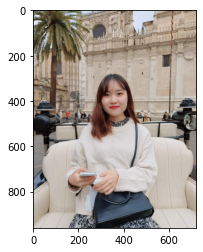

In [2]:
img_path1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/1580076202612-1.jpg'  
img_orig1 = cv2.imread(img_path1)

print(img_orig1.shape)

plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fedc3c2bc70>)

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path1)

In [6]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

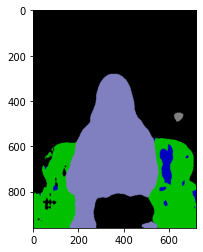

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0,  7,  9, 15, 18]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
car
chair
person
sofa


In [10]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15]

array([192, 128, 128])

In [12]:
seg_color = (128,128,192)

(960, 720)


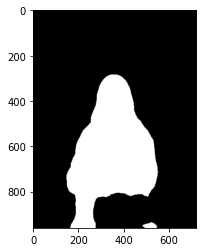

In [13]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

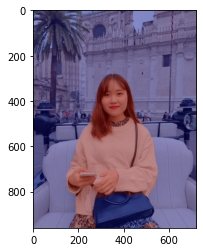

In [14]:
img_show = img_orig1.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

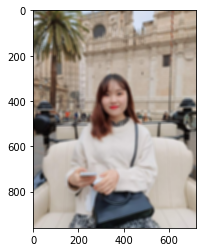

In [15]:
img_orig_blur = cv2.blur(img_orig1, (13,13))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

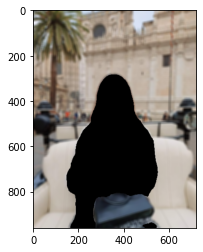

In [16]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

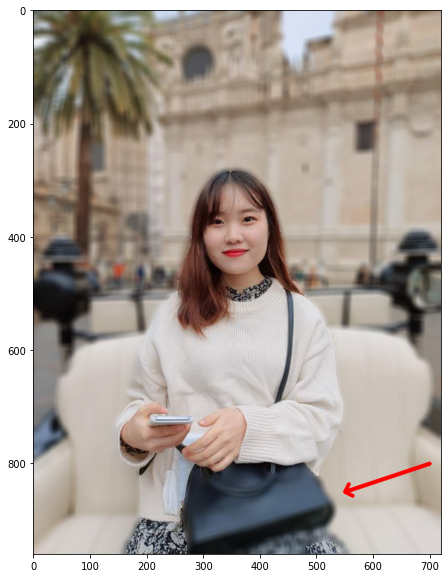

In [17]:
plt.figure(figsize=(24, 10))
img_concat = np.where(img_mask_color==255, img_orig1, img_bg_blur)

cv2.arrowedLine(img_concat, (700,800), (550,850), (0,0,255), 5)
cv2.imwrite('img_concat.jpg', img_concat)

# img_pillow = Image.fromarray(img_concat)

# fontpath = "fonts/gulim.ttc"
# font = ImageFont.truetype(fontpath, 24)
# b,g,r,a = 0,0,255,255
# draw = ImageDraw.Draw(img_pillow, 'RGBA')
# draw.text((200, 70), "텍스트를 삽입합니다.", font=font, fill=(b,g,r,a))

# img_concat = np.array(img_pillow)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

화살표 처리 참고  
https://bskyvision.com/entry/python-%EB%8B%A8%EB%B0%A9%ED%96%A5-%EB%98%90%EB%8A%94-%EC%96%91%EB%B0%A9%ED%96%A5%EC%9C%BC%EB%A1%9C-%ED%99%94%EC%82%B4%ED%91%9C-%EC%9E%88%EB%8A%94-%EC%84%A0-%EA%B7%B8%EB%A6%AC%EA%B8%B0

글씨 쓰기  
https://bskyvision.com/m/entry/python-opencv-%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%97%90-%ED%95%9C%EA%B8%80-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EC%82%BD%EC%9E%85%ED%95%98%EA%B8%B0

#### 가방을 background로 인식해서 블러처리되었다.
    : 사람이 소파로 인식된 부분과 경계가 잘 처리되어있으니, 800~920, 200~600 사이에 처리된 background 부분의 색을 추출해서 그 부분만 사람과 같은 색으로 변경하면 부자연스러운 블러처리를 해결할 수 있을 것 같다.

### Step 2. 동물사진 직접 해 보기

(1440, 1080, 3)


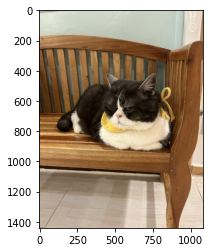

In [18]:
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/고양이.jpg'  
img_orig2 = cv2.imread(img_path2)

print(img_orig2.shape)

plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
segvalues, output = model.segmentAsPascalvoc(img_path2)

In [20]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

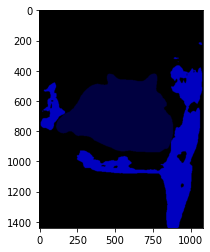

In [21]:
plt.imshow(output)
plt.show()

In [22]:
segvalues

{'class_ids': array([0, 8, 9]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [23]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
chair


In [24]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [25]:
colormap[8]

array([64,  0,  0])

In [26]:
seg_color = (0,0,64)

(1440, 1080)


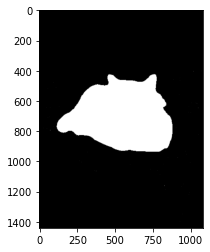

In [27]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

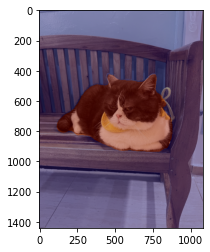

In [28]:
img_show = img_orig2.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

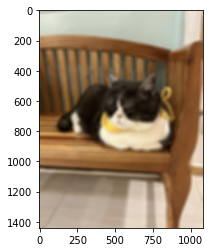

In [29]:
img_orig_blur = cv2.blur(img_orig2, (26,26))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

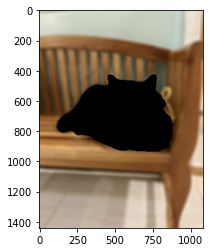

In [30]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

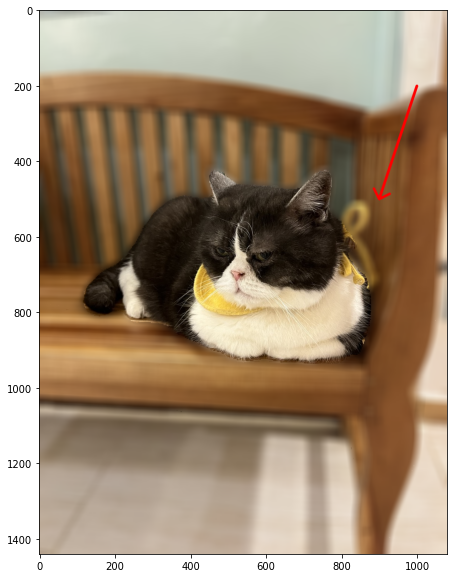

In [31]:
plt.figure(figsize=(24, 10))
img_concat = np.where(img_mask_color==255, img_orig2, img_bg_blur)

cv2.arrowedLine(img_concat, (1000,200), (900,500), (0,0,255), 5)
cv2.imwrite('img_concat.jpg', img_concat)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

#### 고양이 목의 리본까지 블러처리되는 게 부자연스럽다
    : 원본 이미지에서 리본이 노란색이니까 저 노란색만 추출해서 블러처리하지 않도록 변경해주면 될 것 같다.

### Step 3. 배경전환 크로마키 사진 직접 해 보기

(683, 683, 3)


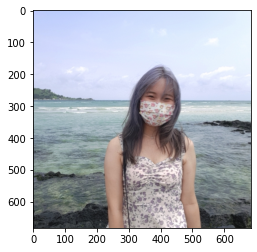

In [32]:
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/20210901_185221.jpg'  
img_orig3 = cv2.imread(img_path3)

print(img_orig3.shape)

plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
plt.show()

In [33]:
segvalues, output = model.segmentAsPascalvoc(img_path3)

In [34]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

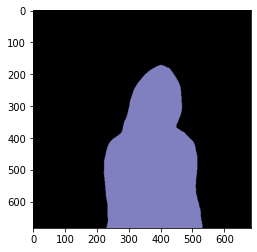

In [35]:
plt.imshow(output)
plt.show()

In [36]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [37]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [38]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [39]:
colormap[15]

array([192, 128, 128])

In [40]:
seg_color = (128,128,192)

(683, 683)


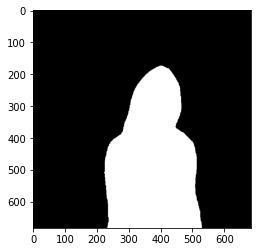

In [41]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

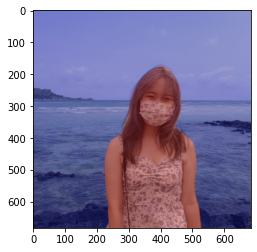

In [42]:
img_show = img_orig3.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

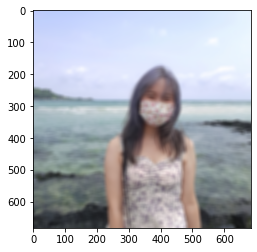

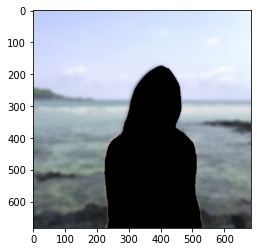

In [43]:
img_orig_blur = cv2.blur(img_orig3, (13,13))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/1583225546805.jpg'  
img_orig_background = cv2.imread(img_path)

In [45]:
img_background = cv2.resize(img_orig_background, (683,683))

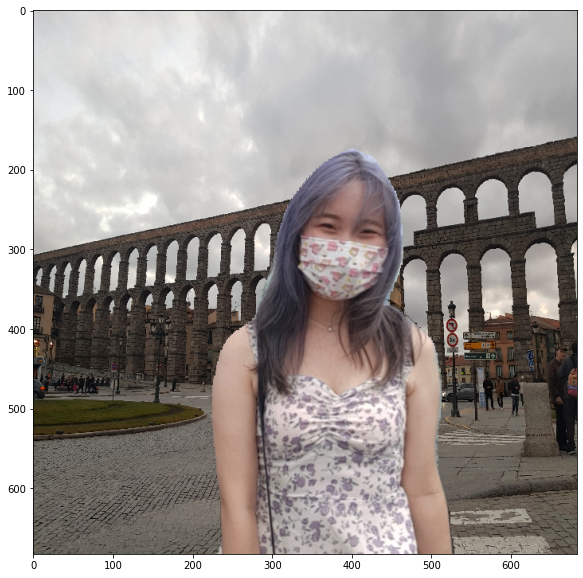

In [46]:
plt.figure(figsize=(24, 10))
img_concat = np.where(img_mask_color==255, img_orig3, img_background)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

#### 머리카락과 어깨부분을 따라 합성 티가 너무 심하게 난다.
    : 사람과 배경의 경계면을 따라 addweight기능으로 흐릿하게 보정한 부분을 먼저 합성한 뒤에 경계면을 따라 조금 더 작게 크롭된 사람 이미지를 덧씌우면 자연스러워질 것 같다.

### 회고

#### 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유
    :루브릭 3번을 해결하기 어려웠다. 세그멘테이션의 원리를 아직 잘 모르기때문인 것 같다. 사진을 보정하기 위해 어떻게 하면 좋을 지 머릿속으로는 떠오르기는 하는데, 이걸 deeplab v3+의 원리와 함께 생각해서 크롭이 잘 되지 않은 근본적인 원인을 파악하는 게 어려웠다. 노드에 있는 링크를 다 읽어봤지만, 피사계 심도에 대한 기본 개념과 사진 이외의 기능을 활용한 기술들을 소개하고 있어서 어떻게 지금 내 사진에 적용을 하라는 건지 잘 모르겠다. 애초에 찍을 때 잘 찍으라는 말로밖에 읽히지 않았다.

#### 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
    : 피사계 심도의 개념에 대해 알았다. 아웃포커싱이라는 말은 우리나라에서만 사용하는 말이고, 외국에서는 심도가 얕다는 표현을 한다. 심도가 얕게 되려면 다른 조건들이 모두 동일하다고 가정했을 때, 센서의 크기가 커야 한다. 센서의 크기가 크면 빛을 받아들이는 면적이 커지기 때문이다. 그렇게 되면 심도가 얕아진다. 초점거리란 렌즈의 중심으로부터 초점 간의 거리를 말하며, 망원렌즈를 사용하면 심도가 잘 얕아진다. 줌 렌즈에서는 줌을 당기면 초점거리가 멀어지게 되고 심도가 얕아져 아웃포커싱이 된다. 또한, 조리개가 많이 개방된다는 말 또한 f값이 작아진다는 뜻으로, 심도가 결국 얕아진다. 카메라와 피사체간의 거리가 가까울수록, 배경에서 인물이 멀어질수록, 심도가 얕아진다고 할 수 있으며 다른 말로는 아웃포커싱이 잘 일어난다고 할 수 있다.

#### 루브릭 평가 지표를 맞추기 위해 시도한 내용
    : 아웃포커싱 효과가 적용된 인물사진을 제작했고, 아웃포커싱 효과가 적용된 고양이 사진도 제작했으며, 배경전환 크로마키 인물사진도 제작했다. 부자연스러운 부분을 그림 위에 표현하기 위해 cv2의 기능을 이용하여 빨간색 화살표를 그려보기도 했다. 루브릭 3을 해결하기 위해 링크를 모두 읽었다.

#### 자기 다짐, 프로젝트를 진행하면서 느낀점
    : 나는 아직 모델의 기본적인 원리를 이해하지 못하고 있다. 특히 컴퓨터 비전 분야의 딥러닝 모델의 원리를 전혀 모르는 것 같다. deeplab v3+는 atrous convolution을 사용한다는 것은 알고는 있는데, 왜 내 사진의 경계면을 부자연스럽게 인식하는지 잘 모르겠다. 구글링을 좀 더 해보고 컴퓨터 비전 책도 많이 읽어야겠다.